In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
import random

# définition des données de départ
# répartition aléatoire autour d'une droite y = x

mul = 0.001

x = np.array([2.8672E-02, 2.2199E-02, 1.8180E-02, 1.5410E-02, 1.3325E-02])
x = x + (np.random.rand(len(x)) - 0.5) * mul

y = np.array([8.64622E-03, 7.07473E-03, 6.13109E-03, 5.46607E-03, 4.90341E-03])
y = y + (np.random.rand(len(y)) - 0.5) * mul

xerror = np.array([8.2209E-04, 4.9280E-04, 3.3052E-04, 2.3748E-04, 1.7756E-04])
yerror = np.array([1.62083E-04, 1.45726E-04, 1.38127E-04, 1.26587E-04, 1.22042E-04])



In [4]:
# définition de la fonction de fit

def linear_func(p, x):
    m, c = p
    return m*x + c

In [5]:
# création du modèle
linear_model = Model(linear_func)

# Création d'un objet RealData du module scipy.odr
data = RealData(x, y)

# Préparation de la régression
odr = ODR(data, linear_model, beta0=[0., 1.])

# Lancement de la regression linéaire orthogonale.
out = odr.run()

# affichage des résultats
out.pprint()

Beta: [0.21738401 0.00217886]
Beta Std Error: [0.01769881 0.00035804]
Beta Covariance: [[ 7.24613709e+03 -1.41313244e+02]
 [-1.41313244e+02  2.96532408e+00]]
Residual Variance: 4.3229615910755875e-08
Inverse Condition #: 0.0005368770426853323
Reason(s) for Halting:
  Sum of squares convergence


<ErrorbarContainer object of 3 artists>

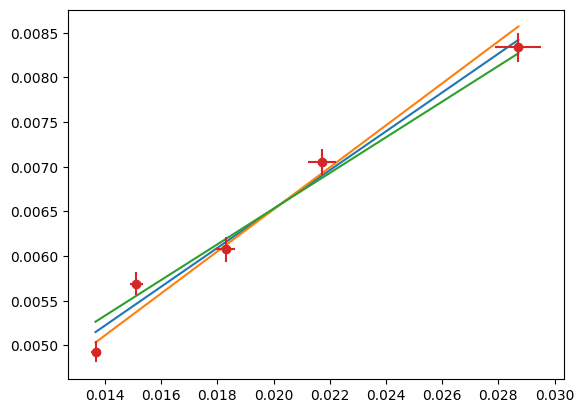

In [6]:
# affichage des droites de régression de pentes min et max
# affichage des points avec leurs barres d'erreur en x et y

y_reg = out.beta[1] + out.beta[0] * np.asarray(x)
y_low = out.beta[1] - out.sd_beta[1] + (out.beta[0] + out.sd_beta[0])* np.asarray(x)
y_high = out.beta[1] + out.sd_beta[1] + (out.beta[0] - out.sd_beta[0])* np.asarray(x)

plt.plot(x, y_reg)
plt.plot(x, y_low)
plt.plot(x, y_high)
plt.errorbar(x, y, xerr=xerror, yerr = yerror, fmt='o')